# Descubra quem fez o ENEM 2016 apenas para treino

Neste desafio deverá descobrir quais estudantes estão fazendo a prova apenas para treino.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
treino = pd.read_csv('train.csv')
df = treino.copy()

In [3]:
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
df.IN_TREINEIRO.value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

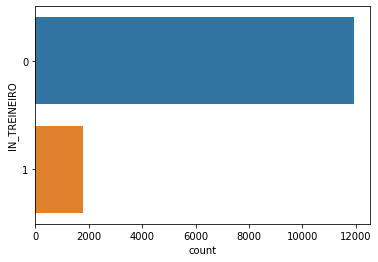

In [5]:
sns.countplot(y=df.IN_TREINEIRO)

In [6]:
test = pd.read_csv('test.csv')

In [7]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [8]:
# criar uma copia 
df_test = test.copy()

#excluir colunas sobre as questões
q = df_test.columns[df_test.columns.str.startswith('Q0')]

df_test.drop(q, axis = 1, inplace = True)

### Balanceamento

In [9]:
from sklearn.utils import resample

In [10]:
df_majority = df[df.IN_TREINEIRO == 0]
df_minority = df[df.IN_TREINEIRO ==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=11947,    # to match majority class
                                 random_state=42) # reproducible results

df = pd.concat([df_majority, df_minority_upsampled])

In [11]:
df.IN_TREINEIRO.value_counts()

1    11947
0    11947
Name: IN_TREINEIRO, dtype: int64

In [12]:
# manter apenas as colunas que estão nos dados de teste.
colunas_teste = list(df_test.columns)
colunas_treino = list(df.columns)

features = list(set(colunas_teste).intersection(colunas_treino))

In [13]:
X_test = test[features]

X_train = df[features]

In [14]:
X_train.shape

(23894, 35)

In [15]:
# dataframe auxiliar para conferir tipos das variáveis e missing values
aux_df = pd.DataFrame({'colunas': X_train.columns,
                      'tipo': X_train.dtypes,
                      'missing': X_train.isna().sum(),
                      'size': X_train.shape[0],
                      'unicos': X_train.nunique()})

In [16]:
aux_df.sort_values('tipo')

,colunas,tipo,missing,size,unicos
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,23894,4
NU_IDADE,NU_IDADE,int64,0,23894,55
TP_PRESENCA_MT,TP_PRESENCA_MT,int64,0,23894,3
TP_PRESENCA_CN,TP_PRESENCA_CN,int64,0,23894,3
IN_DISLEXIA,IN_DISLEXIA,int64,0,23894,2
IN_BAIXA_VISAO,IN_BAIXA_VISAO,int64,0,23894,2
IN_IDOSO,IN_IDOSO,int64,0,23894,2
TP_ESCOLA,TP_ESCOLA,int64,0,23894,4
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,23894,27
IN_DISCALCULIA,IN_DISCALCULIA,int64,0,23894,2


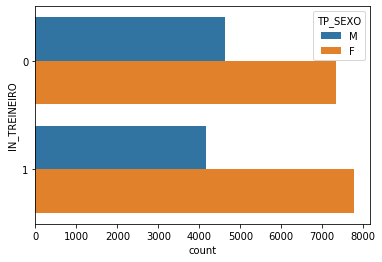

In [17]:
sns.countplot(y = df.IN_TREINEIRO, hue = df.TP_SEXO)

In [18]:
# Preencher missing values com 0.
X_train.fillna(0, inplace = True)
X_test.fillna(0, inplace = True)

C:\Users\camil\anaconda3\envs\test\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [21]:
X_train = X_train[X_train.columns[X_train.dtypes != 'object']]
X_test = X_test[X_test.columns[X_test.dtypes != 'object']]

# importando a biblioteca
from sklearn.preprocessing import  StandardScaler

#instanciando a trasnformacao
sc = StandardScaler()

# transformando os dados
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = df.IN_TREINEIRO

In [22]:
len(y_train)

23894

In [23]:
len(X_train)

23894

In [24]:
len(y_train)

23894

In [25]:
len(X_test)

4570

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state =42)

In [31]:
len(X_train)

19115

In [32]:
len(X_val)

4779

### Treinamento

In [34]:
# ignorando os warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# importando as bibliotecas com os modelos classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# definindo uma lista com todos os modelos
classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(dual=False,max_iter=5000),
    #SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]
# definindo uma lista com todos os classificadores
classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(),
    #SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]

# definindo o tamanho da figura para o gráfico
plt.figure(figsize=(12,8))

# rotina para instanciar, predizer e medir os rasultados de todos os modelos
for clf in classifiers:
    # instanciando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred= clf.predict(X_val)
    print("accuracy:", metrics.accuracy_score(y_val, y_pred))
    print("precision:", metrics.precision_score(y_val, y_pred))
    print("recall:", metrics.recall_score(y_val, y_pred))
    print("auc:", metrics.roc_auc_score(y_val, y_pred))

KNeighborsClassifier
****Results****
accuracy: 0.9792843691148776
precision: 0.9611844737895158
recall: 0.9991680532445923
auc: 0.9791629739907172
GaussianNB
****Results****
accuracy: 0.9792843691148776
precision: 0.9604474630443468
recall: 1.0
auc: 0.9791578947368421
LogisticRegression
****Results****
accuracy: 0.9887005649717514
precision: 0.9780309194467046
recall: 1.0
auc: 0.9886315789473684
DecisionTreeClassifier
****Results****
accuracy: 0.9968612680477087
precision: 0.9946169772256729
recall: 0.9991680532445923
auc: 0.996847184517033
RandomForestClassifier
****Results****
accuracy: 0.9983260096254446
precision: 0.9975083056478405
recall: 0.9991680532445923
auc: 0.9983208687275592
GradientBoostingClassifier
****Results****
accuracy: 0.9953965264699728
precision: 0.9921487603305785
recall: 0.9987520798668885
auc: 0.9953760399334443


<Figure size 864x576 with 0 Axes>

In [44]:
# importar a funcao
from sklearn.tree import DecisionTreeClassifier

# isntanciar o modelo
classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced',criterion='entropy')

# ajustar aos dados de treino
classifier.fit(X_train, y_train)

# predições para os dados de teste
y_pred = clf.predict(X_test) 

In [51]:
from sklearn.metrics import f1_score, accuracy_score
# Avaliando uma métrica mais punitiva para conjunto de treinamento, considerando o desbalanceamento - F1 Score
print('M1 c/ 1 Feature - F1-Score (%): ', 100*round(f1_score(y_train, y_pred,average='macro'), 3))
# Avaliando uma métrica mais branda - Accuracy 
print('M1 c/ 1 Feature - Accuracy (%): ', 100*round(accuracy_score(y_train, y_pred), 3))

ValueError: Found input variables with inconsistent numbers of samples: [19115, 4570]

In [52]:
len(y_pred)

4570

### Submissão

In [56]:
answer = pd.DataFrame(df_test.NU_INSCRICAO)

In [57]:
answer['IN_TREINEIRO'] = y_pred

In [58]:
answer.to_csv('answer.csv')